  0%|                                                   | 0/881 [00:00<?, ?it/s]/Users/main/workspace/lppls/lib/python3.12/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/Users/main/workspace/lppls/lib/python3.12/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/Users/main/workspace/lppls/lib/python3.12/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/Users/main/workspace/lppls/lib/python3.12/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))
/Users/main/workspace/lppls/lib/python3.12/site-packages/lppls/lppls.py:617: RuntimeWarning: invalid value encountered in log
  return (w / (2.0 * np.pi)) * np.log((tc - t1

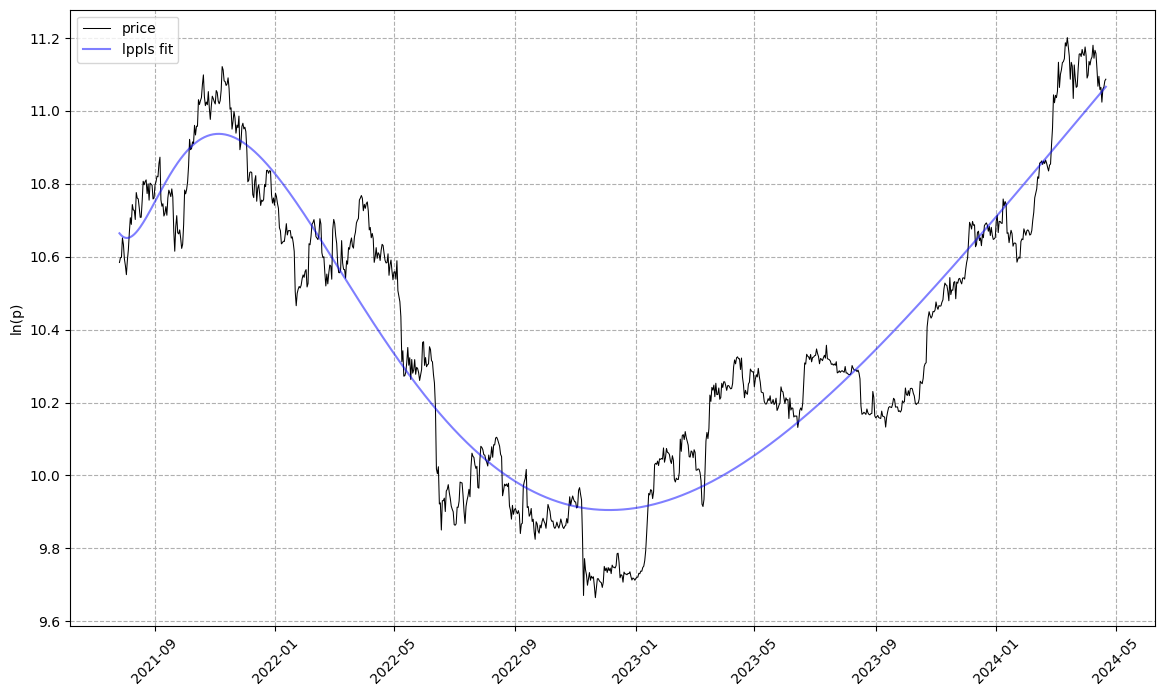

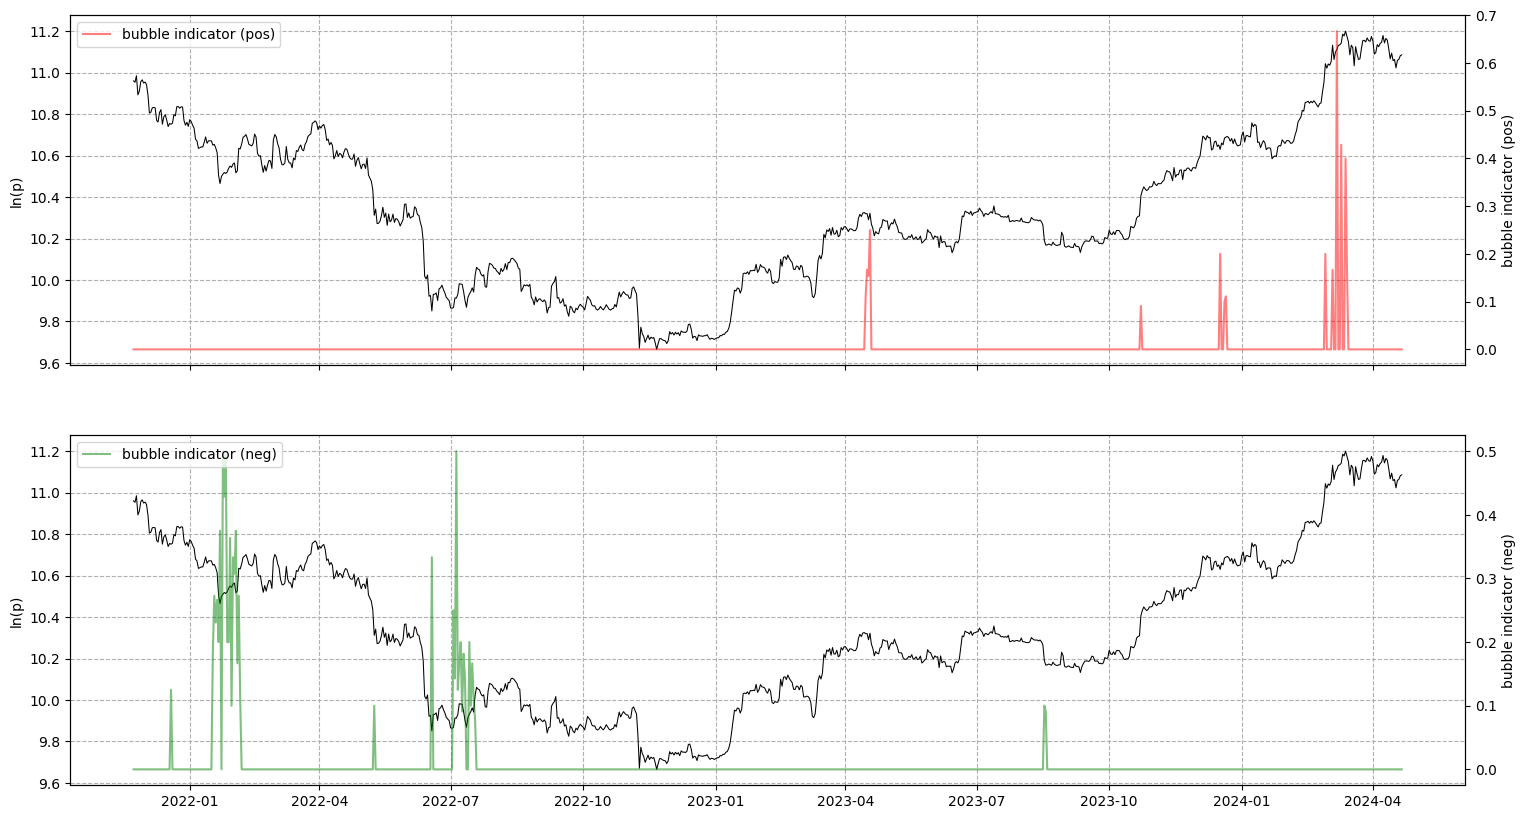

In [11]:
from lppls import lppls
import numpy as np
import pandas as pd
from datetime import datetime as dt

import os

%matplotlib inline

local_path = os.path.abspath('')
data_path = os.path.join(local_path,'data/'+os.environ['TICKER']+'.csv')
# data_path = os.path.join(local_path, 'lib/python3.12/site-packages/lppls/data/nasdaq_dotcom.csv')

def read_data():
    # stream = pkg_resources.resource_stream(__name__, 'data/nasdaq_dotcom.csv')
    # return pd.read_csv(stream, encoding='utf-8')
    return pd.read_csv(data_path, encoding='utf-8')

# read example dataset into df 
data = read_data()

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['datetime']]
# time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]


# create list of observation data
price = np.log(data['close'].values)
# price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()

# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)